# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfx = pd.read_csv("Linear_X_Train.csv")
dfy = pd.read_csv("Linear_Y_Train.csv")

x = dfx.values
y = dfy.values

x = x.reshape((-1,1))
y = y.reshape((-1,1))
print(x.shape)
print(y.shape)

X = (x-x.mean())/x.std()
Y = y

(3750, 1)
(3750, 1)


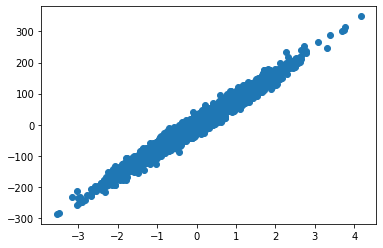

In [2]:
plt.scatter(X,Y)
plt.show()

# Gradient Descent Algorithm

In [14]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.00001):
    
    theta = np.array([100.0,120.0])
    
    itr = 0
    max_itr = 150
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

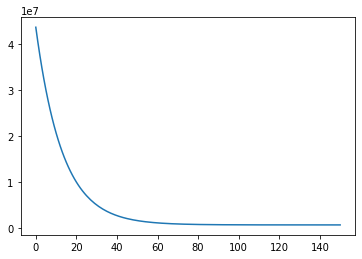

In [15]:
final_theta, error_list,theta_list = gradientDescent(X,Y)
plt.plot(error_list)
plt.show()

In [16]:
print(final_theta)

[ 0.99327677 80.03064593]


In [17]:
dfxt=pd.read_csv("Linear_X_Test.csv")
xtest = dfxt.values
xtest = xtest.reshape((-1,1))
print(xtest)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


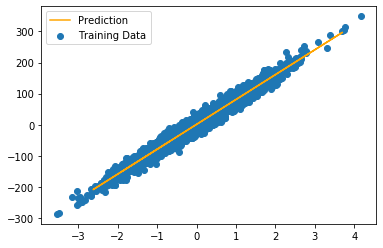

In [18]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

# Prediction for each testing value

In [19]:
prediction_list=hypothesis(xtest,final_theta)
print(xtest)
print(prediction_list)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]
[[-149.29982772]
 [ -68.5559088 ]
 [-201.498857  ]
 ...
 [  11.23782538]
 [ -21.25825113]
 [ -53.46160978]]


# Arranging the above using column stack

In [21]:
print(np.column_stack((xtest,prediction_list)))

[[-1.87794441e+00 -1.49299828e+02]
 [-8.69031916e-01 -6.85559088e+01]
 [-2.53018242e+00 -2.01498857e+02]
 ...
 [ 1.28007821e-01  1.12378254e+01]
 [-2.78037590e-01 -2.12582511e+01]
 [-6.80425428e-01 -5.34616098e+01]]
